In [1]:
import torchvision.models as models
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
original_dataset_dir = '/Users/flatironschool/Documents/Kaggle-DR-detection/train_images/'
path = original_dataset_dir

In [3]:
import tensorflow as tf
from tensorflow import keras
import keras_applications
from keras import models
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [4]:
def getRadius(img):
#     print(type(img.shape))
    circles = cv2.HoughCircles(img,3,1,max(img.shape)/2,param1=50,param2=30,minRadius= int(max(img.shape)/6),maxRadius=max(img.shape))
    return circles

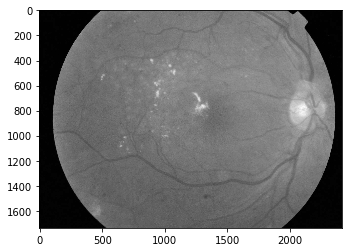

In [96]:
img_list = os.listdir(path)
img = img_list[0]
img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
# new_array = cv2.resize(img_array, (1500, 1000))
rad = getRadius(img_array)
plt.imshow(img_array, cmap='gray')  # graph it
plt.show()

222.5


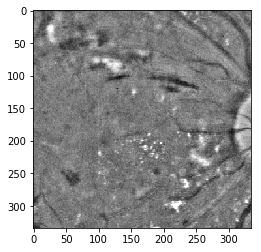

857.5


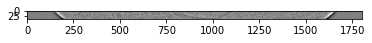

1220.5


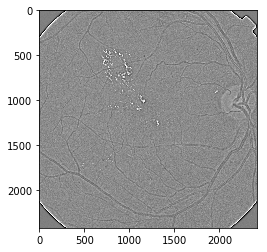

In [ ]:
scale = 300
for img in os.listdir(path)[100:105]:
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    
    try:
        circle = getRadius(img_array)
        center_x = circle[0][0][0]
        center_y = circle[0][0][1]
        crop_r = circle[0][0][2]*0.8 
    except:
        center_x = img_array.shape[1]/2
        center_y = img_array.shape[0]/2
        crop_r = (img_array.shape[1]/2)*0.8
            
    print(center_y)
    left_border = int(center_x - crop_r)
    right_border = int(center_x + crop_r)
    upper_border = int(center_y - crop_r)
    lower_border = int(center_y + crop_r)
    
    cropped = img_array[upper_border:lower_border, left_border:right_border]
    #subtract local mean color 
    a=cv2.addWeighted(cropped, 4, cv2.GaussianBlur(cropped,(0,0), scale/30), -4, 128)
#     a = cv2.resize(a, (512,512), interpolation = cv2.INTER_CUBIC)
    plt.imshow(a, cmap='gray')  # graph it
    plt.show()
        